<img src="images/aaib.PNG" style="width:400px;height:250px;">

# About Today's Practice:

1. Content-Related: **Supervised ML Models: Logistic Regression!**
\
&nbsp;
2. Advertisement Clicks: When someone clicks your ad, like on the blue headline or phone number of a text ad, Google Ads counts that as a click. A click is counted even if the person doesn't reach your website, maybe because it's temporarily unavailable. **The importance of advertising in business derives from the possibility to drive business growth.** Advertising works to amplify your small business marketing efforts and helps you reach the right audience with positive, targeted messaging that converts potential customers into paying customers.
\
&nbsp;
3. Logistic Regression: It is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique category. It is **used for predicting the categorical dependent variable using a given set of independent variables.** Logistic regression predicts the output of a categorical dependent variable.
\
&nbsp;
4. Dataset: This data set contains the following features:`Daily Time Spent on Site`: consumer time on site in minutes, `Age`: cutomer age in years, `Area Income`: Avg. Income of geographical area of consumer, `Daily Internet Usage`: Avg. minutes a day consumer is on the internet, `Ad Topic Line`: Headline of the advertisement, `City`: City of consumer, `Male`: Whether or not consumer was male, `Country`: Country of consumer, `Timestamp`: Time at which consumer clicked on Ad or closed window, `Clicked on Ad`: 0 or 1 indicated clicking on Ad.
\
&nbsp;

# Set-up 

In [20]:
# Commonly used libraries
import pandas as pd
import numpy as np

# From ScikitLearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Data Exploration & Preprocessing

In [21]:
# loading dataset and chekcing its heads!
df = pd.read_csv("datasets/advertising.csv")

In [22]:
# df.ino()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [23]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

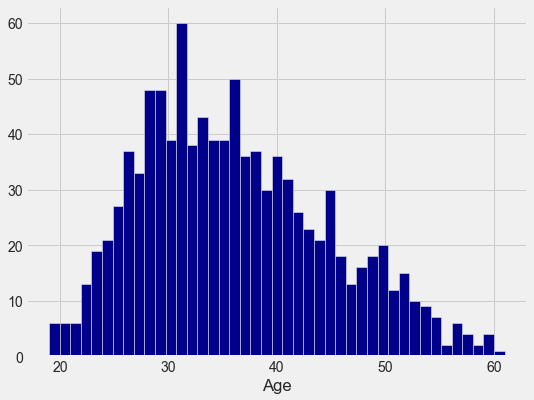

In [24]:
# To plot histograms -- In this case we are checking the histogram of the "age"
plt.figure(figsize=(8, 6))
df.Age.hist(bins=df.Age.nunique(), color = "darkblue")
plt.xlabel('Age')

<Figure size 576x432 with 0 Axes>

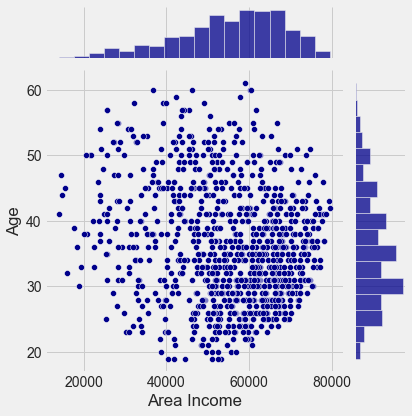

In [25]:
# Here we are checking the "age" per "area income"
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Area Income"], y=df.Age, color = "darkblue")
# sns.jointplot(x=df["Area Income], y=df.Age, color = "darkblue")

<Figure size 576x432 with 0 Axes>

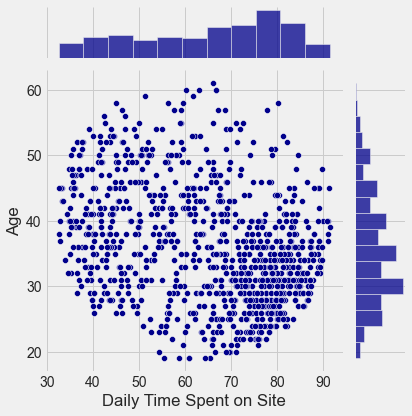

In [26]:
# Here we are checking the "age" per "daily time spent on site"
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Daily Time Spent on Site"], y=df.Age, color = "darkblue")

<Figure size 576x432 with 0 Axes>

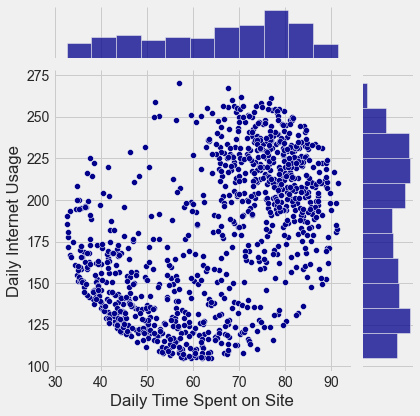

In [27]:
# Here we are checking the "daily internet usage" per "daily time spent on site"
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Daily Time Spent on Site"], y=df["Daily Internet Usage"], color = "darkblue")

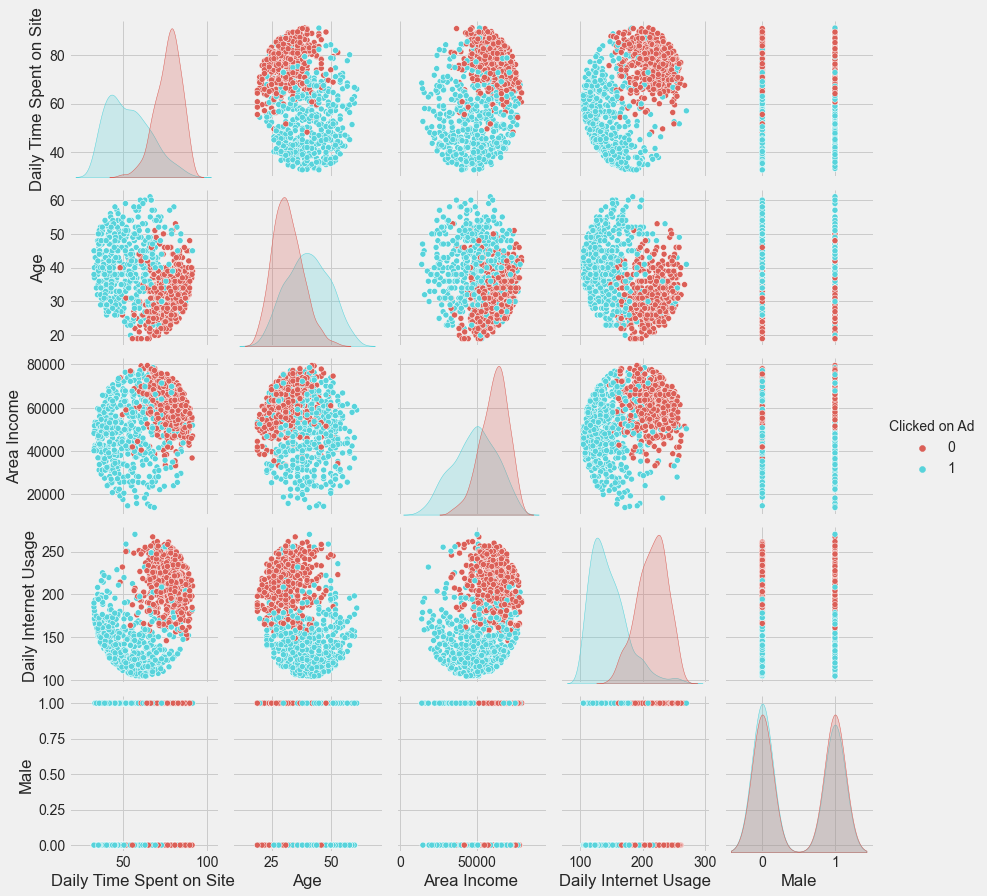

In [28]:
# Here we have all pairwise plots -- highlighting the "clicked on ad" feature!
sns.pairplot(df, hue='Clicked on Ad', palette='hls')

In [29]:
# The "clicked on ad" observations distribution
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

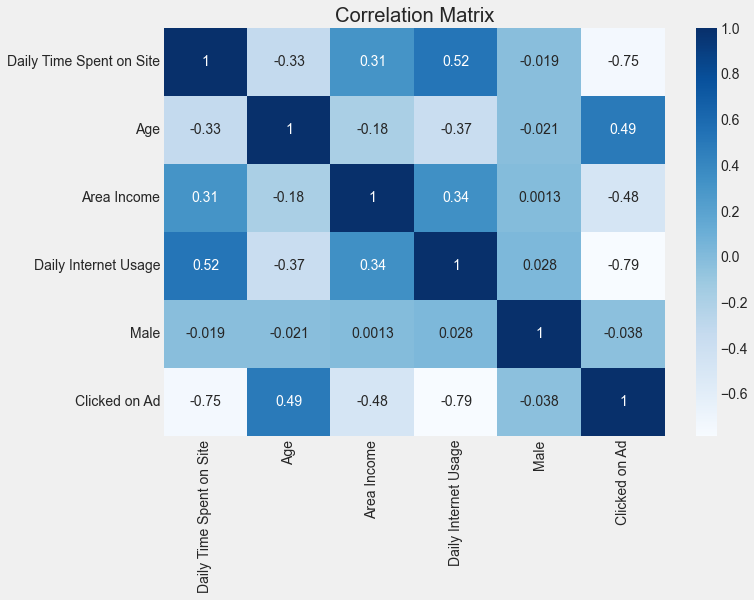

In [30]:
# Correlation among all features

numeric_df = df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'])

correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
# sns.heatmap(df.orr(), annot=True, cmap="Blues")

sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Here we are creating a funciton to make the visualization of the results (metrics of validation) better

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [32]:
# Here we are dropping features with low variance and defining the dependent variable
# We also prepare data to be used as input in the ML models (e.g., scaling)

X = df.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# If we had any categorical feature we would use the belo line with the features too!
# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Model Implementation -- K-means Clustering from Mock Exam 

In [33]:
df = pd.read_csv("datasets/advertising.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [34]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [35]:

df.fillna(method='ffill', inplace=True)  # Example of handling missing values


In [42]:
#only numeric columns
numeric_df = df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'])


# Define features and target variable
X = numeric_df.drop('Clicked on Ad', axis=1)
y = numeric_df['Clicked on Ad']

In [41]:
# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.cluster import KMeans


def kmeans_clustering(X, init_method, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    df['Cluster'] = cluster_labels
    
    # Generate summary of descriptive statistics for each cluster
    cluster_summary = df.groupby('Cluster').mean()
    return cluster_labels, cluster_summary

In [44]:
# k-means++ initialization
cluster_labels_pp, cluster_summary_pp = kmeans_clustering(X_scaled, 'k-means++')

# Random initialization
cluster_labels_random, cluster_summary_random = kmeans_clustering(X_scaled, 'random')

In [45]:
# Function to plot clusters
def plot_clusters(df, x_col, y_col, cluster_labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_labels, data=df, palette='viridis')
    plt.title(title)
    plt.show()

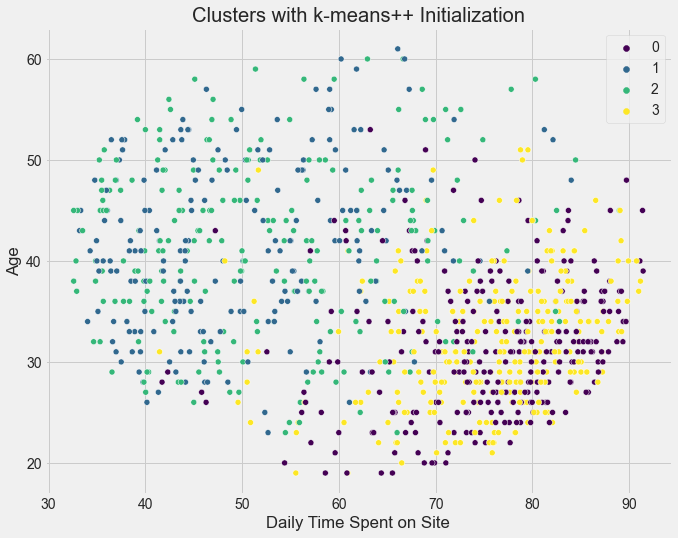

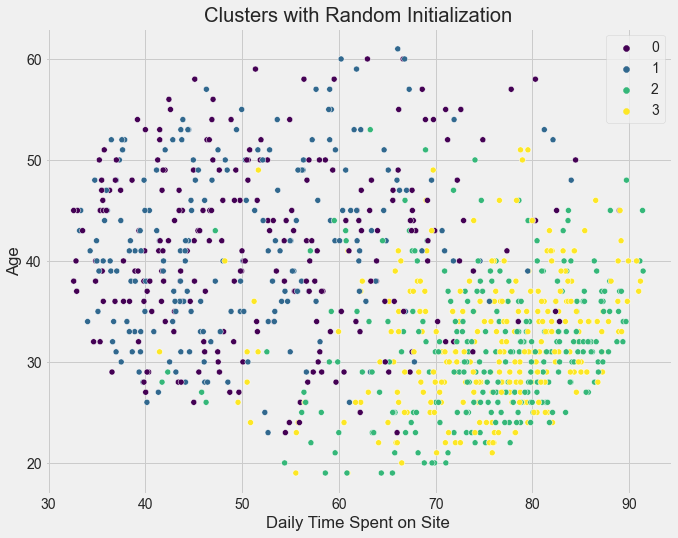

In [46]:
# Plot clusters
plot_clusters(df, 'Daily Time Spent on Site', 'Age', cluster_labels_pp, 'Clusters with k-means++ Initialization')
plot_clusters(df, 'Daily Time Spent on Site', 'Age', cluster_labels_random, 'Clusters with Random Initialization')



In [47]:
# Display cluster summaries
print("Cluster Summary with k-means++ Initialization:\n", cluster_summary_pp)
print("Cluster Summary with Random Initialization:\n", cluster_summary_random)

Cluster Summary with k-means++ Initialization:
          Daily Time Spent on Site        Age   Area Income  \
Cluster                                                      
0                       75.591455  31.360000  60492.981200   
1                       50.133058  41.766990  47710.140049   
2                       52.916849  41.226891  46924.735378   
3                       75.768434  31.918149  61808.022705   

         Daily Internet Usage  Male  Clicked on Ad  
Cluster                                             
0                  211.634800   1.0       0.094545  
1                  140.750631   1.0       0.995146  
2                  140.989958   0.0       0.995798  
3                  210.855125   0.0       0.113879  
Cluster Summary with Random Initialization:
          Daily Time Spent on Site        Age   Area Income  \
Cluster                                                      
0                       52.916849  41.226891  46924.735378   
1                       50.133

In [50]:
# Display the descriptive statistics
print("Descriptive Statistics for k-means++ Initialization:")
desc_stats_pp = df.groupby('Cluster').describe()
print(desc_stats_pp)
print("\nDescriptive Statistics for Random Initialization:")
desc_stats_random = df.groupby('Cluster').describe()
print(desc_stats_random)

Descriptive Statistics for k-means++ Initialization:
        Daily Time Spent on Site                                        \
                           count       mean        std    min      25%   
Cluster                                                                  
0                          238.0  52.916849  12.694476  32.60  42.4025   
1                          206.0  50.133058  11.049843  33.21  41.1650   
2                          275.0  75.591455   9.201388  41.73  70.4150   
3                          281.0  75.768434   8.650130  41.47  70.6800   

                                  Age             ... Male      Clicked on Ad  \
            50%     75%    max  count       mean  ...  75%  max         count   
Cluster                                           ...                           
0        50.705  62.195  88.97  238.0  41.226891  ...  0.0  0.0         238.0   
1        48.145  57.640  84.00  206.0  41.766990  ...  1.0  1.0         206.0   
2        76.870  82.460